In [4]:
#how to perform classification with TensorFlow

#how to identify and deal with overfitting
    #early stopping callbacks
    #dropout layers
    

#early stopping
    #automatic stop training on the validation data
    #during the model.fit() call
    
#dropout layers
    #layers added to turn of neurons during training 
    #to avoid overfitting

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('cd../DATA/cancer_classification.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cd../DATA/cancer_classification.csv'

## Exploratory Data Analysis

In [6]:
df.info()
# all are 569 so no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

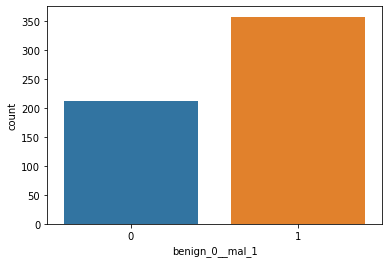

In [9]:
#count plot of label

#well balanced but not extreme
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

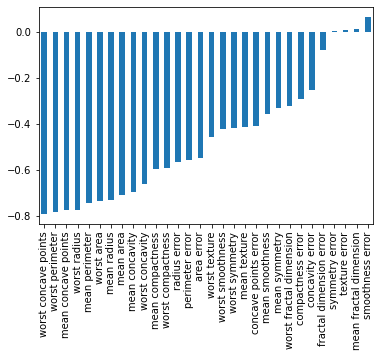

In [15]:
#corelation between figures

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

#we have lots of negative corrilations

<AxesSubplot:>

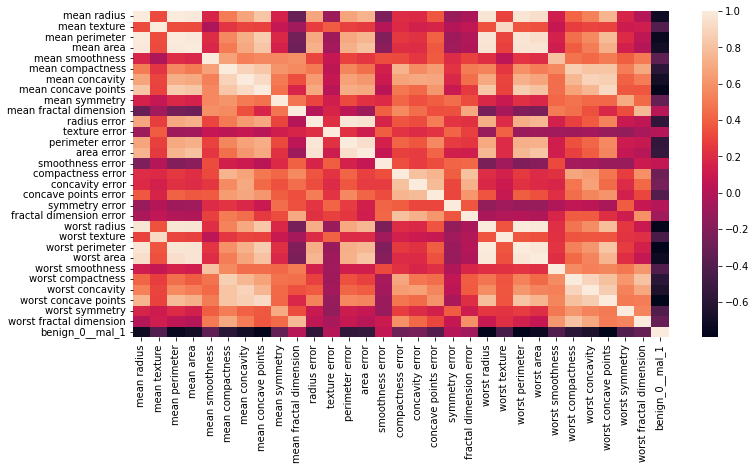

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

# train test split

In [19]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [26]:
#scale data

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

# create model

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.layers import Dense,Dropout

In [39]:
X_train.shape

(426, 30)

In [42]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#binary classification problem
#last activation must be sigmoid
model.add(Dense(1, activation='sigmoid'))  


model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 36ms/step - loss: 0.6769 - val_loss: 0.6481
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6337 - val_loss: 0.6121
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5947 - val_loss: 0.5708
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5518 - val_loss: 0.5266
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5023 - val_loss: 0.4732
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4478 - val_loss: 0.4174
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4004 - val_loss: 0.3669
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3542 - val_loss: 0.3270
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3127 - val_loss: 0.2877
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2832 - val_loss: 0.2602
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.1282
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.1219
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.1210
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1233
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.1184
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.1263
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.1202
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.1262
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.1219
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.1247
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.1803
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1652
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1762
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.1689
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.1800
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.1673
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1759
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.1731
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1720
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.1793
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.2318
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.2251
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.2322
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.2225
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.2300
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.2239
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.2352
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.2290
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.2379
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.2223
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2749
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.3117
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.2728
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.3289
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.2736
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.3011
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.2943
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.2904
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.3166
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.2878
Epoc

In [44]:
#plot out the loss
#training loss
#validation loss

losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

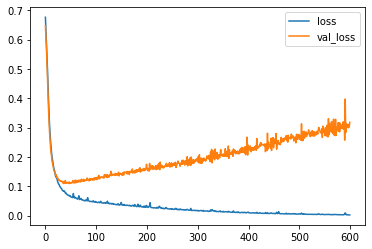

In [46]:
losses.plot()
#perfect example of overfitting!
#val and training loss are decreasing,
#until about 33? training loss decreases while val loss increases
#we are training for too many epochs


### Prevent overfitting

In [ ]:
#let's use early stopping to, based on val loss, stop training

In [61]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

#binary classification problem
#last activation must be sigmoid
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [63]:
#step 1 define variable
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [64]:
#step 2 fit model with early_stop
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
#whats nice is you can run a huge epochs bc earlystop will stop it for you

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6753 - val_loss: 0.6480
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6353 - val_loss: 0.6117
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6027 - val_loss: 0.5763
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5636 - val_loss: 0.5371
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5204 - val_loss: 0.4907
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4763 - val_loss: 0.4455
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4320 - val_loss: 0.3964
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3837 - val_loss: 0.3476
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3386 - val_loss: 0.3019
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3020 - val_loss: 0.2665
Epoch 11

<AxesSubplot:>

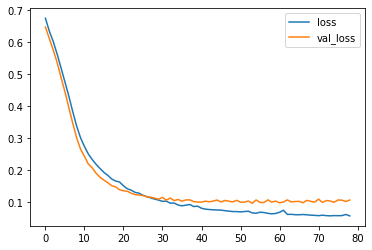

In [65]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Dropouts Layers

In [67]:
#will turn of percent of neurons randomly?

In [69]:
from tensorflow.keras.layers import Dropout

In [70]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.7043 - val_loss: 0.6863
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7024 - val_loss: 0.6727
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6741 - val_loss: 0.6596
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6537 - val_loss: 0.6428
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6397 - val_loss: 0.6236
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6229 - val_loss: 0.5959
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5959 - val_loss: 0.5619
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5675 - val_loss: 0.5217
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5132 - val_loss: 0.4811
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5030 - val_loss: 0.4423
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1069 - val_loss: 0.0760
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1023 - val_loss: 0.0729
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1188 - val_loss: 0.0860
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.0761
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.0772
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.0806
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1254 - val_loss: 0.0742
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0925 - val_loss: 0.0731
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1098 - val_loss: 0.0727
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1106 - val_loss: 0.0789
Epoch 93/600


<AxesSubplot:>

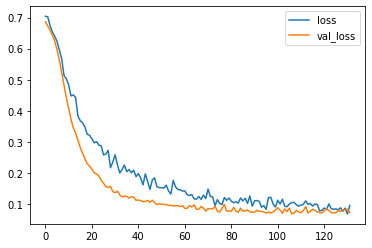

In [72]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [73]:
# evaluation on our classes

In [77]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [80]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
